- https://github.com/kairess/image-stitching/blob/master/main.ipynb

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import glob, os

# Get images path

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [ ]:
default_path = '/content/data/MyDrive/ai_lecture/2. Deep Learning/2. Vision Pytorch/Image_Processing/data/'

In [ ]:
IMG_NAME = 'boat'

img_list = []
for ext in ('0*.gif', '0*.png', '0*.jpg'):
    img_list.extend(glob.glob(os.path.join(default_path, IMG_NAME, ext)))

img_list = sorted(img_list)

print(img_list)

['/content/data/MyDrive/google_lecture/06. deep learning/2. Vision Pytorch/Image_Processing/mini projects/boat/01.jpg', '/content/data/MyDrive/google_lecture/06. deep learning/2. Vision Pytorch/Image_Processing/mini projects/boat/02.jpg', '/content/data/MyDrive/google_lecture/06. deep learning/2. Vision Pytorch/Image_Processing/mini projects/boat/03.jpg', '/content/data/MyDrive/google_lecture/06. deep learning/2. Vision Pytorch/Image_Processing/mini projects/boat/04.jpg', '/content/data/MyDrive/google_lecture/06. deep learning/2. Vision Pytorch/Image_Processing/mini projects/boat/05.jpg', '/content/data/MyDrive/google_lecture/06. deep learning/2. Vision Pytorch/Image_Processing/mini projects/boat/06.jpg']


# Load images

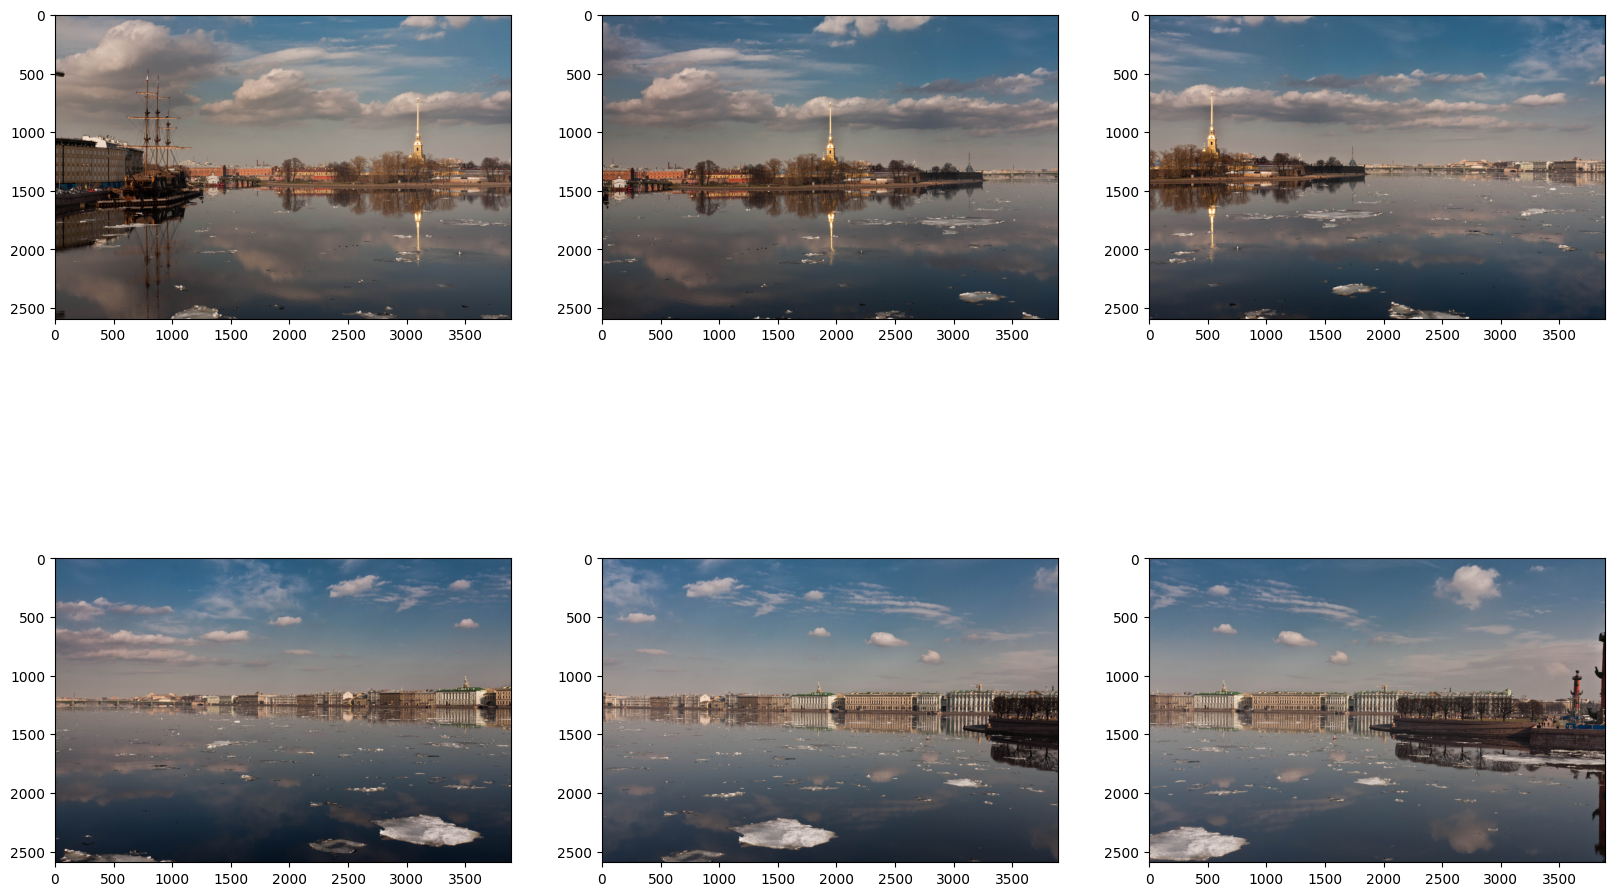

In [ ]:
imgs = []

plt.figure(figsize=(20, 20))

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path)
    imgs.append(img)

    plt.subplot(len(img_list) // 3 + 1, 3, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# [Stitch images](https://deep-learning-study.tistory.com/266)
 이미지 스티칭은 동일 장면의 사진을 자연스럽게(seamless) 붙여서 한 장의 사진으로 만드는 기술입니다.

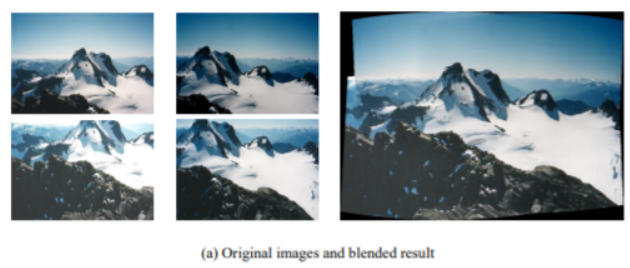

## cv2.Stitcher_create()
이미지 스티칭을 하기 위해서는 우선 이미지 스티칭 객체를 생성해야 합니다.
- mode의 인자는 일반적인 사진을 합성할 때는 cv2.PANORAMA를 입력합니다.
- cv2.SCANS는 스캐너에서 문서를 스캔하듯이 자유도가 좀 더 낮습니다.

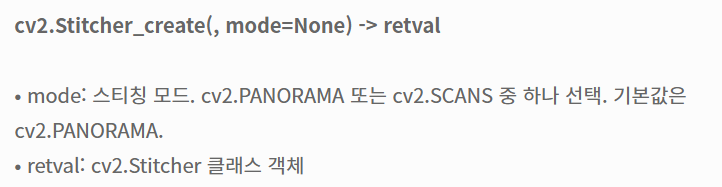

## cv2.Stitcher.stitch()
Stitcher 객체를 생성하고 이미지 스티칭 함수를 이용하면 파노라마 영상을 출력할 수 있습니다.

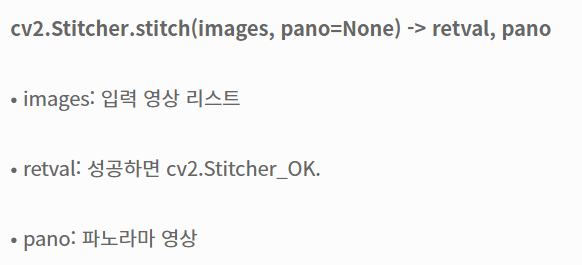

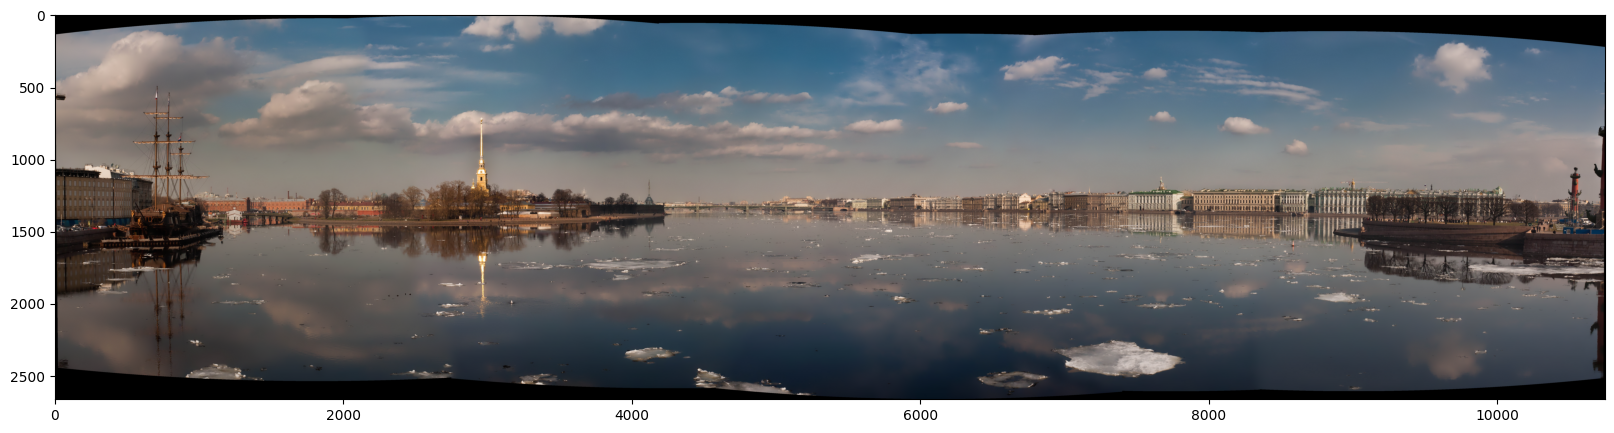

In [ ]:
mode = cv2.STITCHER_PANORAMA

stitcher = cv2.Stitcher_create(mode)

status, stitched = stitcher.stitch(imgs)

if status == 0:
    cv2.imwrite(os.path.join('imgs', IMG_NAME, 'result.jpg'), stitched)

    plt.figure(figsize=(20, 20))
    plt.imshow(cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB))
else:
    print('failed... %s' % status)

# Get image mask

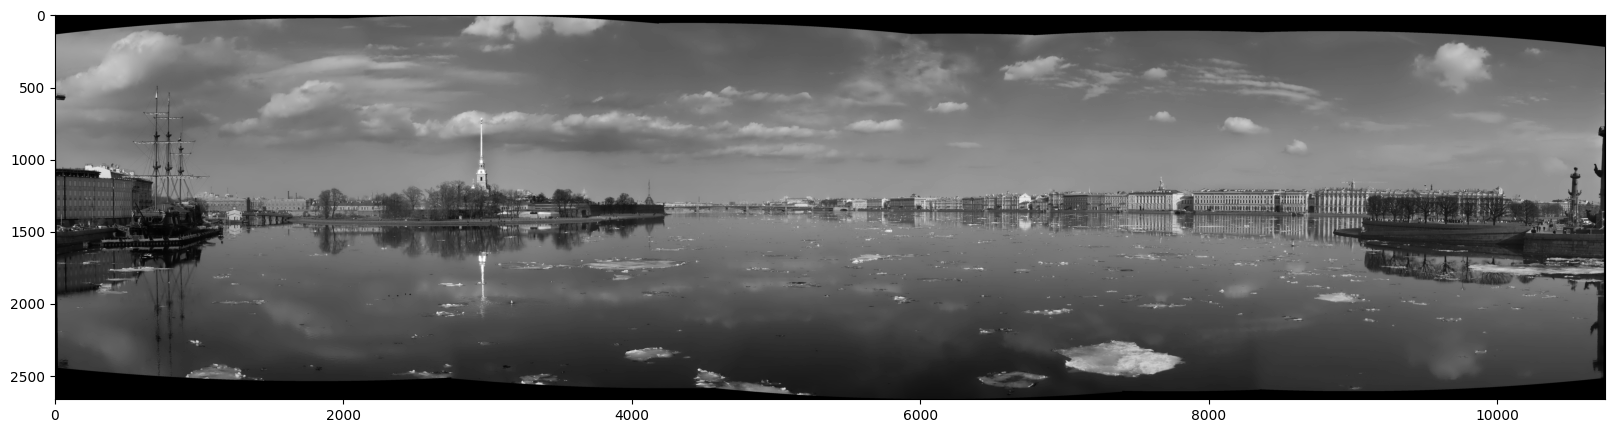

In [ ]:
gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 20))
plt.imshow(gray, cmap='gray')

## [cv2.threshold()](https://opencv-python.readthedocs.io/en/latest/doc/09.imageThresholding/imageThresholding.html)
- 영상의 이진화는 영상의 픽셀 값을 0 또는 255(1)로 만드는 연산입니다.
- 이진화를 하는 이유는 1. 배경과 객체를 구분, 2. 관심 영역과 비관심 영역 구분 입니다.
- 마스크 영상도 이진 영상의 한 형태라고 볼 수 있습니다.

In [ ]:
tmp_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
tmp_thresh

(0.0,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

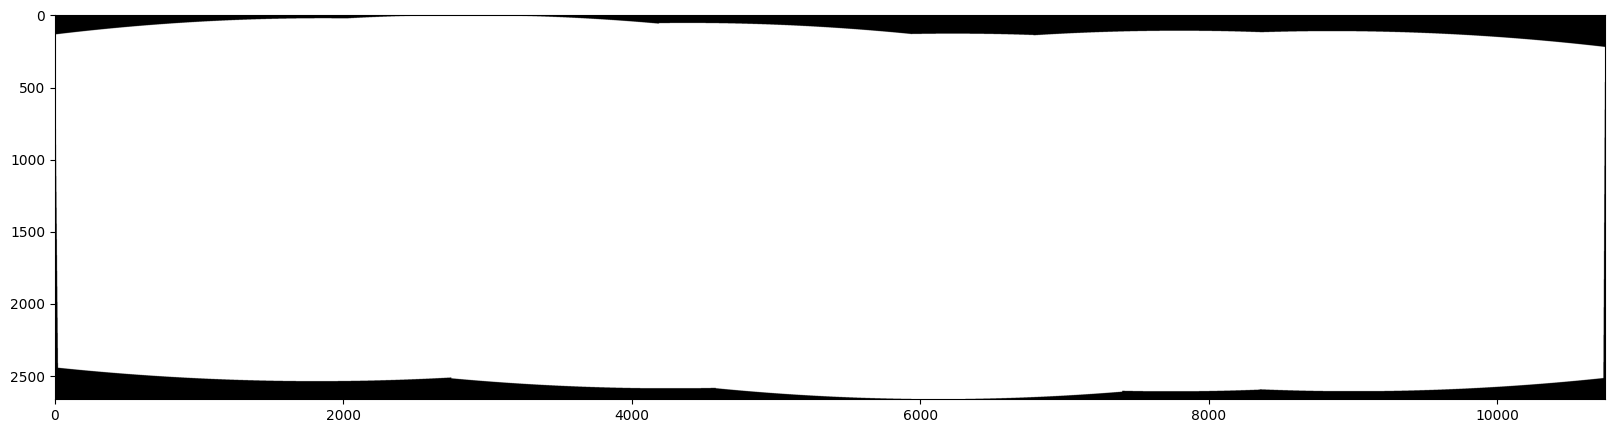

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(tmp_thresh[1], cmap='gray')

## [cv2.bitwise_not()](https://engineer-mole.tistory.com/237)
python 이미지 처리 라이브러리인 OpenCV를 이용해 2개의 이미지를 합성하거나 겹치는 방법으로 bitwise를 사용할 수 있다.

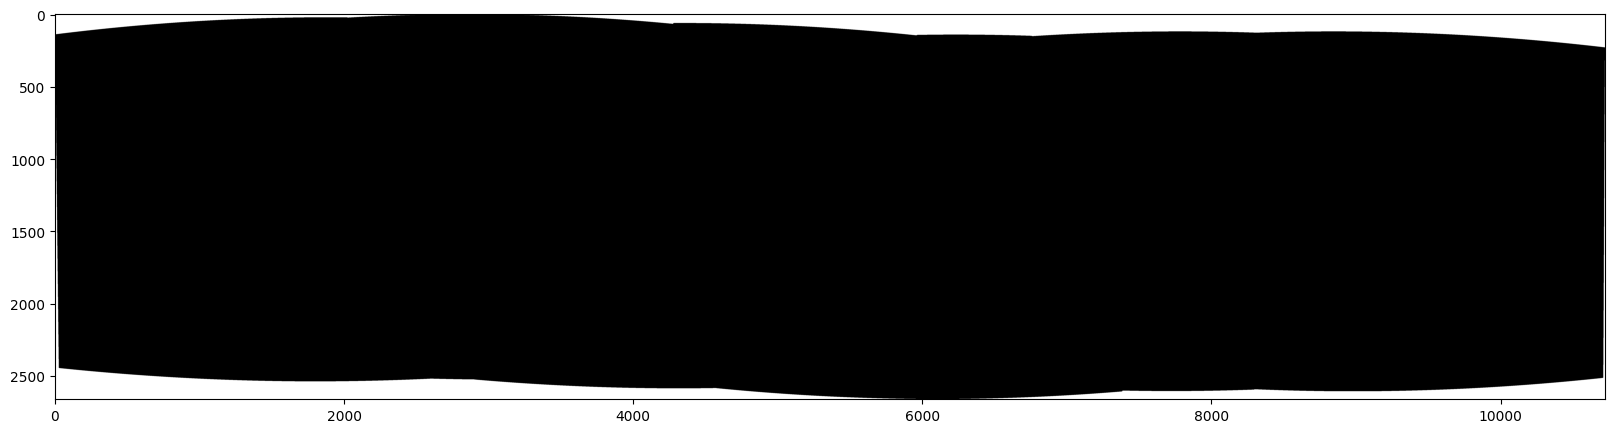

In [ ]:
gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
thresh = cv2.bitwise_not(cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1])
thresh = cv2.medianBlur(thresh, 5)

plt.figure(figsize=(20, 20))
plt.imshow(thresh, cmap='gray')

# Remove margin

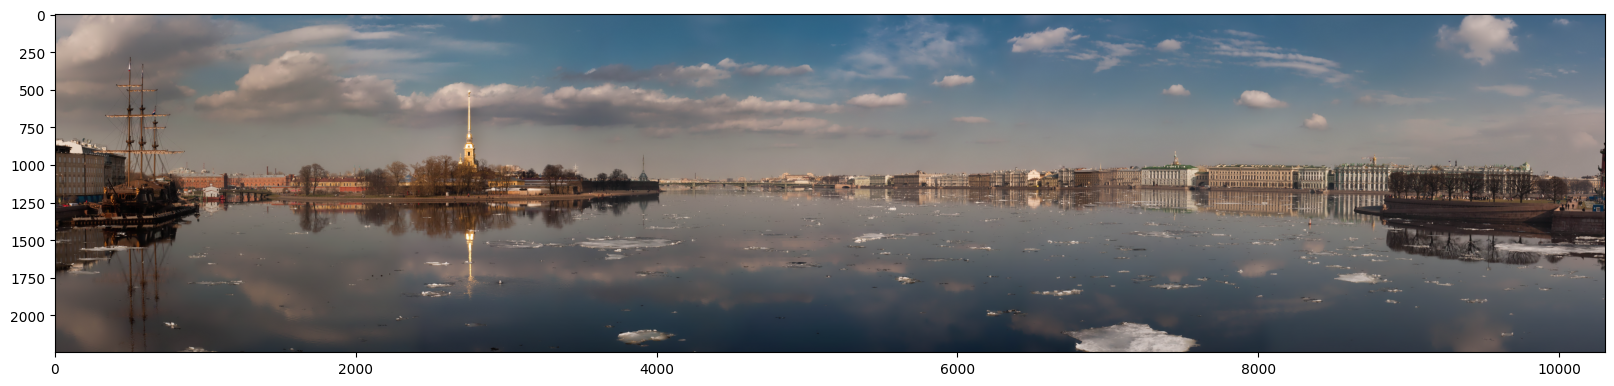

In [ ]:
stitched_copy = stitched.copy()
thresh_copy = thresh.copy()

while np.sum(thresh_copy) > 0:
    thresh_copy = thresh_copy[1:-1, 1:-1]
    stitched_copy = stitched_copy[1:-1, 1:-1]

cv2.imwrite(os.path.join('imgs', IMG_NAME, 'result_crop.jpg'), stitched_copy)

plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(stitched_copy, cv2.COLOR_BGR2RGB))